In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import pearsonr
from scipy import stats

In [3]:
df = pd.read_csv("D:\Belajar\DOC\Semester 3\EDA\Dataset Multivariat\house_data.csv", sep = ",")
df.head(30)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [4]:
# drop dan mengganti nama variabel
df.drop(['id', 'date','bathrooms', 'sqft_above', 'sqft_basement', 'floors', 'waterfront', 'view', 'yr_renovated', 'yr_built', 'zipcode', 'lat', 'long', 'condition', 'grade', 'sqft_living15', 'sqft_lot15'], axis=1, inplace=True)
df.rename(columns={'bedrooms': 'x1', 'sqft_living': 'x2', 'sqft_lot': 'x3', 'price': 'y'}, inplace=True)
df.head()

,y,x1,x2,x3
0,221900.0,3,1180,5650
1,538000.0,3,2570,7242
2,180000.0,2,770,10000
3,604000.0,4,1960,5000
4,510000.0,3,1680,8080


## Mengetahui Hubungan Linier Variabel Dependen dan Independen

### 1. Visualisasi Dengan Scatter Plot

#### a. Scatter plot untuk bedrooms (x1) VS price (y)

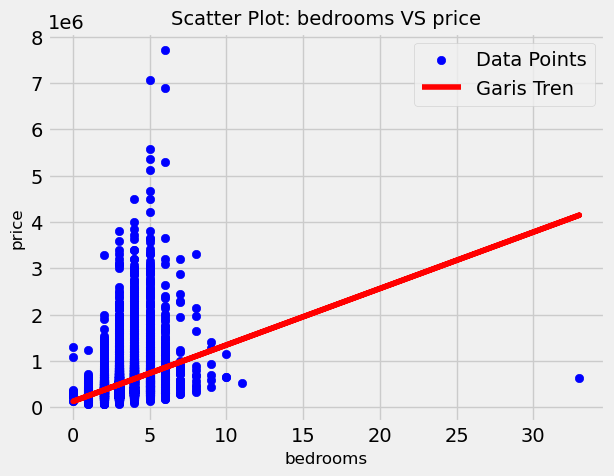

In [8]:
plt.style.use('fivethirtyeight')  # Gaya plot
plt.scatter(df['x1'], df['y'], color='blue', label='Data Points')  # Scatter plot

# Menghitung regresi linear (garis lurus)
m, b = np.polyfit(df['x1'], df['y'], 1)  # m: slope, b: intercept
plt.plot(df['x1'], m * df['x1'] + b, color='red', label='Garis Tren')  # Garis tren

# Membuat label dan judul
plt.title('Scatter Plot: bedrooms VS price', fontsize=14)
plt.xlabel('bedrooms', fontsize=12)
plt.ylabel('price', fontsize=12)

# Menambahkan legenda
plt.legend()

# Menampilkan plot
plt.show()

#### b. Scatter plot untuk sqft_living (x2) VS price (y)

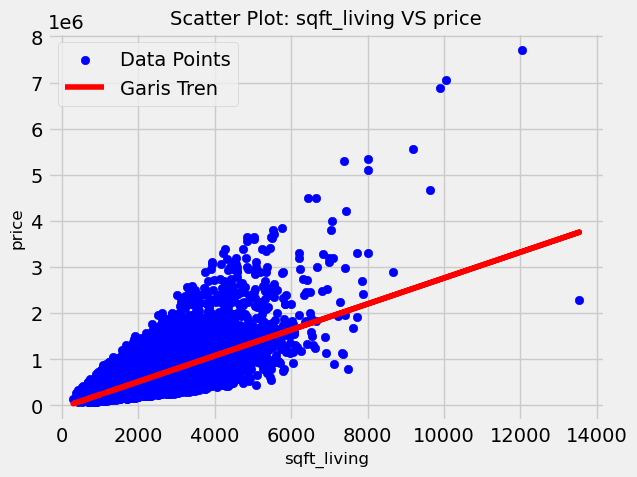

In [10]:
plt.style.use('fivethirtyeight')  # Gaya plot
plt.scatter(df['x2'], df['y'], color='blue', label='Data Points')  # Scatter plot

# Menghitung regresi linear (garis lurus)
m, b = np.polyfit(df['x2'], df['y'], 1)  # m: slope, b: intercept
plt.plot(df['x2'], m * df['x2'] + b, color='red', label='Garis Tren')  # Garis tren

# Membuat label dan judul
plt.title('Scatter Plot: sqft_living VS price', fontsize=14)
plt.xlabel('sqft_living', fontsize=12)
plt.ylabel('price', fontsize=12)

# Menambahkan legenda
plt.legend()

# Menampilkan plot
plt.show()

#### c. Scatter plot untuk sqft_lot (x3) VS price (y)

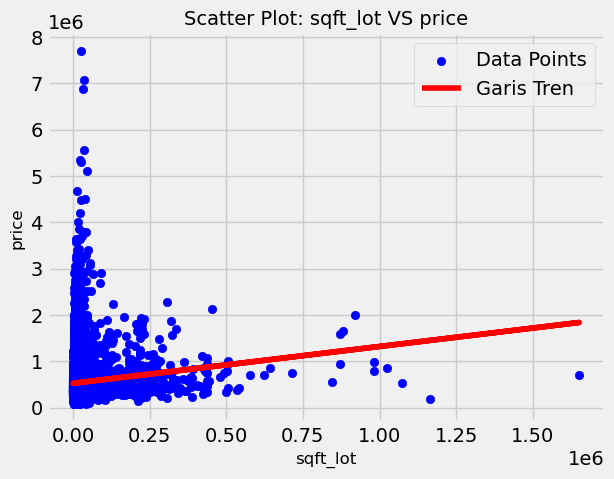

In [12]:

plt.style.use('fivethirtyeight')  # Gaya plot
plt.scatter(df['x3'], df['y'], color='blue', label='Data Points')  # Scatter plot

# Menghitung regresi linear (garis lurus)
m, b = np.polyfit(df['x3'], df['y'], 1)  # m: slope, b: intercept
plt.plot(df['x3'], m * df['x3'] + b, color='red', label='Garis Tren')  # Garis tren

# Membuat label dan judul
plt.title('Scatter Plot: sqft_lot VS price', fontsize=14)
plt.xlabel('sqft_lot', fontsize=12)
plt.ylabel('price', fontsize=12)

# Menambahkan legenda
plt.legend()

# Menampilkan plot
plt.show()

## Mengetahui seberapa kuat hubungan variabel dependen dan independen menggunakan metode korelasi

In [14]:
# menghitung nilai korelasi pearson
list1 = df['x1']
list2 = df['y']
corr, _ = pearsonr(list1, list2)
print('Koefisien Pearson antara x2 dan y: %.5f' % corr)

Koefisien Pearson antara x1 dan y: 0.30835


In [15]:
# menghitung nilai korelasi pearson
list1 = df['x2']
list2 = df['y']
corr, _ = pearsonr(list1, list2)
print('Koefisien Pearson antara x1 dan y: %.5f' % corr)

Koefisien Pearson antara x3 dan y: 0.70204


In [16]:
# menghitung nilai korelasi pearson
list1 = df['x3']
list2 = df['y']
corr, _ = pearsonr(list1, list2)
print('Koefisien Pearson antara x1 dan y: %.5f' % corr)

Koefisien Pearson antara x1 dan y: 0.08966


## Memodelkan dengan regresi linear berganda

In [18]:
x = df[['x1', 'x2', 'x3']]
y = df['y']
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     7455.
Date:                Sun, 24 Nov 2024   Prob (F-statistic):               0.00
Time:                        17:15:32   Log-Likelihood:            -2.9993e+05
No. Observations:               21613   AIC:                         5.999e+05
Df Residuals:                   21609   BIC:                         5.999e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.278e+04   6603.510     12.536      0.0

## UJI T

#### Berdasarkan Model OLS Regression Results diperoleh hasil uji T sebagai Berikut:
##### 1. Menentukan Hipotesis Nol dan Hipotesis Alternatif
###### Untuk setiap koefisien variabel (x1, x2, x3), kita melakukan pengujian terhadap hipotesis berikut:
###### H0 (Hipotesis Nol): Koefisien variabel = 0 (tidak ada pengaruh variabel independen terhadap variabel dependen).
###### H1 (Hipotesis Alternatif): Koefisien variabel ≠ 0 (ada pengaruh variabel independen terhadap variabel dependen).
##### 2. Tingkat Signifikansi
###### Tingkat signifikansi yang ditentukan adalah α = 0.05 (5%).
##### 3. Uji Statistik t-Hitung 
###### Nilai t-hitung diberikan pada kolom t dalam tabel hasil regresi untuk masing-masing variabel. Nilai ini menunjukkan seberapa jauh koefisien variabel dari nol, relatif terhadap ketidakpastian (standard error).
###### Untuk x1 (bedrooms): t-hitung = -25.428
###### Untuk x2 (sqft_living): t-hitung = 133.801
###### Untuk x3 (sqft_lot): t-hitung = -8.866
##### 4. Menentukan Titik Kritis Pengujian
###### Titik kritis diperoleh dari distribusi t-Student untuk derajat kebebasan tertentu (n - k - 1) pada tingkat signifikansi 0.05.
###### Jumlah observasi (n) = 21613
###### Jumlah parameter (k) = 3 (x1, x2, x3)
###### Derajat kebebasan = n - k - 1 = 21613 - 3 - 1 = 21609
###### Dengan α = 0.05 dan derajat kebebasan sangat besar, nilai kritis t pada distribusi t-Student mendekati nilai dari distribusi normal, yaitu ±1.96.
##### 5. Kesimpulan Hasil Pengujian
###### Pengujian Kriteria pengujian:
###### Jika |t-hitung| > t-kritis (1.96), maka H₀ ditolak.
###### Jika |t-hitung| ≤ t-kritis (1.96), maka H₀ gagal ditolak.

##### Hasil untuk masing-masing variabel:
##### x1 (bedrooms): 
###### t-hitung = -25.428
###### |t-hitung| = 25.428 > 1.96
###### P-value = 0.000 (lebih kecil dari 0.05)
###### Kesimpulan: H₀ ditolak. Jumlah kamar tidur (bedrooms) secara signifikan memengaruhi harga properti.

##### x2 (sqft_living):
###### t-hitung = 133.801
###### |t-hitung| = 133.801 > 1.96
###### P-value = 0.000 (lebih kecil dari 0.05)
###### Kesimpulan: H₀ ditolak. Luas area tinggal (sqft_living) secara signifikan memengaruhi harga properti.

##### x3 (sqft_lot):
###### t-hitung = -8.866
###### |t-hitung| = 8.866 > 1.96
###### P-value = 0.000 (lebih kecil dari 0.05)
###### Kesimpulan: H₀ ditolak. Luas lahan (sqft_lot) secara signifikan memengaruhi harga properti.

## UJI F

In [23]:
# memilih variabel yang dipakai
x1 = df['x1']
x2 = df['x2']
x3 = df['x3']
y = df['y']

# Menentukan parameter model regresi linier berganda 
b0 = 8.278e+04
b1 = -5.88e+04
b2 = 317.9358      
b3 = -0.3818

# Hitung prediksi
y_pred = b0 + b1 * x1 + b2 * x2 + b3 * x3

# Hitung rata-rata untuk y
mean_y = np.mean(y)

# Menghitung SST
sst = np.sum((y - mean_y) ** 2)
print('Nilai SST:', sst)

# Menghitung SSR
ssr = np.sum((y_pred - mean_y) ** 2)
print('Nilai SSR:', ssr)

# Menghitung SSE
sse = np.sum((y - y_pred) ** 2)
print('Nilai SSE:', sse)

# Menentukan jumlah variabel independen (k) dan total data (n)
k = 3  # jumlah variabel independen (x1, x2, x3)
n = len(df)

# Menghitung MSR
msr = ssr / k
print('Nilai MSR:', msr)

# Menghitung MSE
mse = sse / (n - k - 1)
print('Nilai MSE:', mse)

# Menghitung F hitung
f_hit = msr / mse
print(f"F-hitung: {f_hit}")

# Menentukan tingkat signifikansi
alpha = 0.05

# Menghitung F tabel
f_tabel = stats.f.ppf(1 - alpha, k, n - k - 1)
print(f"F-tabel: {f_tabel}")

# Menentukan hasil pengujian
if f_hit > f_tabel:
    print("Karena F-hitung > F-tabel, maka H0 ditolak. Artinya, minimal ada satu variabel independen yang berpengaruh terhadap variabel dependennya.")
else:
    print("Karena F-hitung < F-tabel, maka H0 gagal ditolak. Artinya, tidak ada variabel independen yang berpengaruh signifikan terhadap variabel dependennya.")

Nilai SST: 2912916761921299.5
Nilai SSR: 1481475773024252.0
Nilai SSE: 1431434150164081.5
Nilai MSR: 493825257674750.7
Nilai MSE: 66242498503.59024
F-hitung: 7454.810262749768
F-tabel: 2.605320089388989
Karena F-hitung > F-tabel, maka H0 ditolak. Artinya, minimal ada satu variabel independen yang berpengaruh terhadap variabel dependennya.


## UJI Z

In [73]:
# Pemilihan variabel
x1 = df['x1']
x2 = df['x2']
x3 = df['x3']
y = df['y']

# Menggabungkan variabel independen ke dalam satu matriks
X = pd.DataFrame({'x1': x1, 'x2': x2, 'x3': x3})

# Menambahkan konstanta untuk model regresi
X = sm.add_constant(X)

# Membuat model regresi
model = sm.OLS(y, X)
result = model.fit()

# Menghitung nilai z-statistic
coefficients = result.params
standard_errors = result.bse
z_statistics = coefficients / standard_errors

# Menampilkan hasil sebagai tabel
z_results = pd.DataFrame({
    'Coef': coefficients,
    'Std Err': standard_errors,
    'z-statistic': z_statistics,
    'P>|z|': result.pvalues
})

print(z_results)


               Coef      Std Err  z-statistic          P>|z|
const  82781.110918  6603.510413    12.535925   6.332209e-36
x1    -58798.178194  2312.351245   -25.427875  1.443901e-140
x2       317.935795     2.376188   133.800777   0.000000e+00
x3        -0.381824     0.043067    -8.865809   8.171112e-19


#### Berdasarkan Model OLS Regression Results diperoleh hasil uji T sebagai Berikut:
#### 1. Hipotesis (H0 dan H1)

#### Uji dilakukan untuk masing-masing variabel independen (x1, x2, dan x3).
##### H0 (Hipotesis Nol): Koefisien variabel independen = 0 (Tidak ada hubungan signifikan antara variabel independen dan variabel dependen).
##### H1 (Hipotesis Alternatif): Koefisien variabel independen ≠ 0 (Ada hubungan signifikan antara variabel independen dan variabel dependen).

##### 2. Tingkat Signifikansi
###### Tingkat signifikansi yang ditentukan adalah α = 0.05 (5%).

#### 3. Uji Statistik (z-statistik) 
###### Dari tabel
###### Untuk x1 (bedrooms): z-hitung = -25.427875
###### Untuk x2 (sqft_living): z-hitung = 133.800777
###### Untuk x3 (sqft_lot): z-hitung = -8.865809

##### 4. Menentukan Titik Kritis Pengujian
###### Distribusi normal standar digunakan dalam uji z.
###### Dengan tingkat signifikansi α = 0,05, nilai z-tabel untuk pengujian dua arah:
###### Jumlah observasi (n) = 21613
###### Jumlah parameter (k) = 3 (x1, x2, x3)
###### Derajat kebebasan = n - k - 1 = 21613 - 3 - 1 = 21609
###### Dengan α = 0.05 dan derajat kebebasan sangat besar, nilai kritis z pada distribusi mendekati nilai dari distribusi normal, yaitu ±1.96.

##### 5. Kesimpulan Hasil Pengujian
###### Pengujian Kriteria pengujian:
###### Jika |z-hitung| > z-kritis (1.96), maka H₀ ditolak.
###### Jika |z-hitung| ≤ z-kritis (1.96), maka H₀ gagal ditolak.

##### Hasil untuk masing-masing variabel:
##### x1 (bedrooms): 
###### z-hitung = -25.427875
###### |z-hitung| = 25.427875 > 1.96
###### P-value = 1.443901e-140 (lebih kecil dari 0.05)
###### Kesimpulan: Tolak H₀. Jumlah kamar tidur (bedrooms) ada hubungan signifikan dengan harga properti.

##### x2 (sqft_living):
###### z-hitung = 133.800777
###### |z-hitung| = 133.800777 > 1.96
###### P-value = 0.000 (lebih kecil dari 0.05)
###### Kesimpulan: Tolak H₀. Luas area tinggal (sqft_living) ada hubungan signifikan dengan harga properti.

##### x3 (sqft_lot):
###### t-hitung = -8.865809
###### |t-hitung| = 8.865809 > 1.96
###### P-value = 8.171112e-19 (lebih kecil dari 0.05)
###### Kesimpulan: Tolak H₀. Luas lahan (sqft_lot) ada hubungan signifikan dengan harga properti.

## UJI ASUMSI REGRESI

In [20]:
# mencari nilai prediksi
prediksi = model.predict(x)
print(prediksi)

0        279393.510384
1        720716.402318
2        206177.079101
3        468833.437933
4        437433.576228
             ...      
21608    392396.500364
21609    579800.543538
21610    288963.803578
21611    414172.053544
21612    289068.423293
Length: 21613, dtype: float64


In [21]:
# nilai residual
residual = model.resid
print(residual)

0        -57493.510384
1       -182716.402318
2        -26177.079101
3        135166.562067
4         72566.423772
             ...      
21608    -32396.500364
21609   -179800.543538
21610    113137.196422
21611    -14172.053544
21612     35931.576707
Length: 21613, dtype: float64


### a. Memeriksa asumsi residual berdistribusi normal 

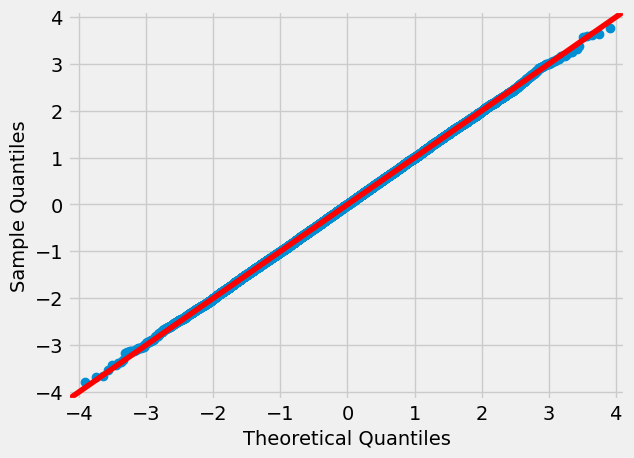

In [51]:
# Menggambar Plot QQ menggunakan package statmodels
import scipy.stats as stats
import matplotlib.pyplot as plt
fig = sm.qqplot(residual, stats.t, fit=True, line='45')
plt.show()

### b. Memeriksa asumsi residual tidak terjadi autokorelasi

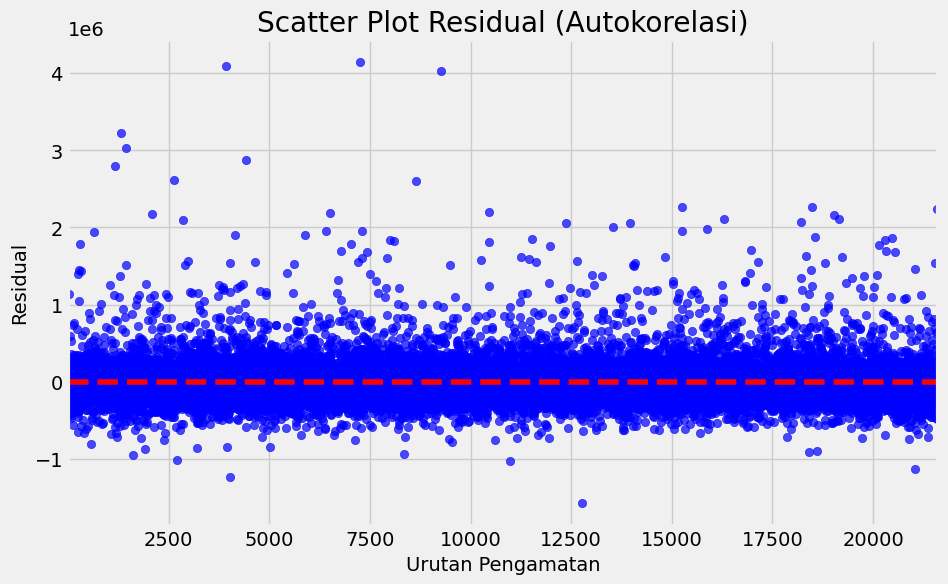

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm


# Variabel independen dan dependen
X = df[['x1', 'x2', 'x3']]  # Variabel independen
y = df['y']                 # Variabel dependen

# Tambahkan konstanta untuk model OLS
X = sm.add_constant(X)

# Fit model regresi
model = sm.OLS(y, X).fit()

# Hitung residual
residual = model.resid

# Plot residual untuk memeriksa autokorelasi
urutan_pengamatan = range(1, len(residual) + 1)
plt.figure(figsize=(10, 6))
plt.scatter(urutan_pengamatan, residual, color='blue', alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.title('Scatter Plot Residual (Autokorelasi)')
plt.xlabel('Urutan Pengamatan')
plt.ylabel('Residual')
plt.xlim([1, len(residual)])
plt.show()


### c. Uji asumsi multikolinearitas variabel independen

In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df[['x1', 'x2', 'x3']]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# Menghitung VIF untuk setiap variabel
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)

  feature       VIF
0      x1  9.189957
1      x2  9.504067
2      x3  1.172539
